In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [16]:
crimes = pd.read_csv('fatal-police-shootings-data.csv')
crimes

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [17]:
race_ilness = crimes.pivot_table(values='name', index='race', columns='signs_of_mental_illness', aggfunc=[len],fill_value=0, margins=True)
race_ilness

len            
signs_of_mental_illness False  True   All
race                                     
A                          69    24    93
B                        1114   184  1298
H                         745   157   902
N                          64    14    78
O                          37    11    48
W                        1763   713  2476
All                      3792  1103  4895

In [18]:
def percentage(row):

    number = round((row['len'][True]/(row['len']['All']/100)), 2)
    return number

race_ilness['percentage'] = race_ilness.apply(lambda row: percentage(row),axis=1)
race_ilness

len             percentage
signs_of_mental_illness False  True   All           
race                                                
A                          69    24    93      25.81
B                        1114   184  1298      14.18
H                         745   157   902      17.41
N                          64    14    78      17.95
O                          37    11    48      22.92
W                        1763   713  2476      28.80
All                      3792  1103  4895      22.53

<AxesSubplot:>

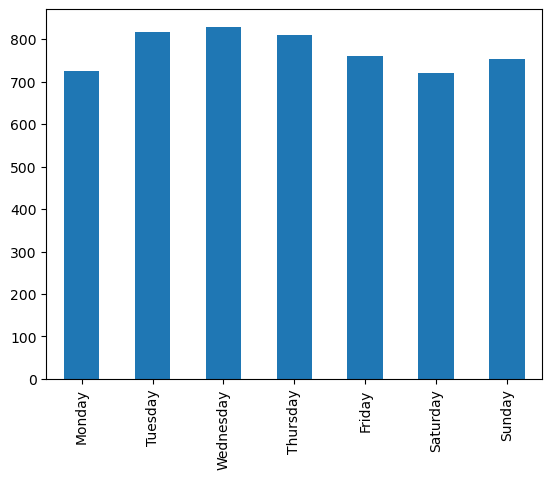

In [25]:
crimes['date'] = pd.to_datetime(crimes['date'])
crimes['date'].dt.day_name()
crimes['week_days'] = crimes['date'].dt.day_name()
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ile_dni = crimes['week_days'].value_counts().reindex(weekdays)
ile_dni.plot(kind="bar")

In [28]:
population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
population[0]
states = population[0]

states_population = pd.DataFrame({'State':states['State'], 'Population':states['Population estimate, July 1, 2019[2]']})
states_population.drop(states_population.index[[56,57,58,59]], inplace=True)
states_population

,State,Population
0,California,39512223
1,Texas,28995881
2,New York,21477737
3,Florida,19453561
4,Illinois,12801989
5,Pennsylvania,12671821
6,Ohio,11689100
7,Georgia,10617423
8,North Carolina,10488084
9,Michigan,9986857


In [29]:
acronimes = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
acronimes[0]
states_2 = acronimes[0]

states_2.columns = range(states_2.columns.size)

states_acronimes = pd.DataFrame({'State':states_2[0], 'Acronime':states_2[5]})
states_acronimes.dropna(axis='index', inplace=True)
states_acronimes

,State,Acronime
8,Name and status of region,USPS
11,Alabama,AL
12,Alaska,AK
13,Arizona,AZ
14,Arkansas,AR
...,...,...
83,Nebraska,NB
84,Northern Mariana Islands,CM
85,Panama Canal Zone,CZ
86,Philippine Islands,PI


In [30]:
states_ac_pop = pd.merge(states_population,states_acronimes,how='inner',on='State')
states_ac_pop

,State,Population,Acronime
0,California,39512223,CA
1,Texas,28995881,TX
2,New York,21477737,NY
3,Florida,19453561,FL
4,Illinois,12801989,IL
5,Pennsylvania,12671821,PA
6,Ohio,11689100,OH
7,Georgia,10617423,GA
8,North Carolina,10488084,NC
9,Michigan,9986857,MI


In [31]:
state_3 = crimes.groupby('state')['name'].count()
state_of_interventions = state_3.to_frame(name='#Interventions')
state_of_interventions.reset_index(inplace=True)
state_of_interventions.rename(columns={'state':'Acronime'}, inplace=True)
state_of_interventions

,Acronime,#Interventions
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799
5,CO,195
6,CT,21
7,DC,13
8,DE,13
9,FL,350


In [32]:
final_table = pd.merge(state_of_interventions, states_ac_pop, how='inner',on='Acronime')
final_table

,Acronime,#Interventions,State,Population
0,AK,39,Alaska,731545
1,AL,104,Alabama,4903185
2,AR,83,Arkansas,3017825
3,AZ,254,Arizona,7278717
4,CA,799,California,39512223
5,CO,195,Colorado,5758736
6,CT,21,Connecticut,3565287
7,DC,13,District of Columbia,705749
8,DE,13,Delaware,973764
9,FL,350,Florida,19453561


In [33]:
def percentage(row):

    number = row['Population']/1000
    final = round((row['#Interventions']/number), 3)
    return final

final_table['Percentage'] = final_table.apply(lambda row: percentage(row),axis=1)

In [34]:
final_table

,Acronime,#Interventions,State,Population,Percentage
0,AK,39,Alaska,731545,0.053
1,AL,104,Alabama,4903185,0.021
2,AR,83,Arkansas,3017825,0.028
3,AZ,254,Arizona,7278717,0.035
4,CA,799,California,39512223,0.020
5,CO,195,Colorado,5758736,0.034
6,CT,21,Connecticut,3565287,0.006
7,DC,13,District of Columbia,705749,0.018
8,DE,13,Delaware,973764,0.013
9,FL,350,Florida,19453561,0.018
